In [75]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
country_coverage = pd.read_csv("../../data/places/coverage_by_country.csv")

In [37]:
country_coverage

country iso_alpha3   Latitude   Longitude  count_of_articles_nyt  \
0    Adriatic Sea    No code  43.702151   14.667946                    1.0   
1      Aegean Sea    No code  38.062228   25.720589                    2.0   
2     Afghanistan        AFG  33.768006   66.238514                   89.0   
3          Africa        ZAF  11.502434   17.757812                  199.0   
4         Albania        ALB   5.758765  -73.915162                   20.0   
..            ...        ...        ...         ...                    ...   
237       Vietnam        VNM  15.926666  107.965086                   51.0   
238    Yellow Sea    No code  36.000000  124.000000                    1.0   
239         Yemen        YEM  16.347124   47.891527                   90.0   
240        Zambia        ZMB -14.518912   27.558988                   11.0   
241      Zimbabwe        ZWE -18.455496   29.746841                    3.0   

     count_of_articles_zeit  \
0                       0.0   
1                       0.0   
2                     168.0   
3                       0.0   
4                      61.0   
..                      ...   
237                    35.0   
238                     0.0   
239                    99.0   
240                     5.0   
241                     6.0   

                                   ids_of_articles_nyt  \
0    ['nyt://article/6c5919fe-452a-532d-8234-f698a3...   
1    ['nyt://interactive/6addaf57-b7fa-5d0f-af24-ec...   
2    ['nyt://article/bf24d7e3-26df-577e-8327-5ad156...   
3    ['nyt://article/e4d46fbb-0e78-5c0f-8bbe-9caa61...   
4    ['nyt://article/c81db80b-5820-56a0-b426-1466f0...   
..                                                 ...   
237  ['nyt://article/182fbcdd-cf29-534a-900d-c2d66f...   
238  ['nyt://article/593fcdd3-0e07-58b1-9a5d-eec8cd...   
239  ['nyt://article/df39f071-31c5-5992-aaef-19f15a...   
240  ['nyt://article/bc01f508-b5f4-5c61-a671-45a715...   
241  ['nyt://article/415aea4c-2180-5418-ba50-e6bad3...   

                                  ids_of_articles_zeit  perc_of_coverage_nyt  \
0                                                   []              0.000031   
1                                                   []              0.000063   
2    ['8298581376', '8184489802', '8478156165', '81...              0.002799   
3                                                   []              0.006258   
4    ['8374221914', '8406497605', '8406583117', '83...              0.000629   
..                                                 ...                   ...   
237  ['8316584811', '8107267090', '8336739402', '83...              0.001604   
238                                                 []              0.000031   
239  ['7937609389', '8367515653', '8316863505', '81...              0.002830   
240  ['8362705221', '7927847804', '8253025150', '84...              0.000346   
241  ['7927847804', '8061318921', '7957960454', '79...              0.000094   

     perc_of_coverage_zeit  middle_point  \
0                 0.000000      0.000031   
1                 0.000000      0.000063   
2                 0.003646     -0.000847   
3                 0.000000      0.006258   
4                 0.001324     -0.000695   
..                     ...           ...   
237               0.000760      0.000844   
238               0.000000      0.000031   
239               0.002148      0.000682   
240               0.000109      0.000237   
241               0.000130     -0.000036   

                                          keywords_nyt  \
0    {'Eni SpA': 1, 'Carbon Capture and Sequestrati...   
1    {'Restaurants': 2, 'Travel and Vacations': 2, ...   
2    {'AFGHANISTAN': 87, 'Taliban': 44, 'Afghanista...   
3    {'AFRICA': 195, 'Politics and Government': 31,...   
4    {'ALBANIA': 13, 'Zegler, Rachel (2001- )': 7, ...   
..                                                 ...   
237  {'Vietnam': 43, 'China': 13, 'Politics and Gov...   
238  {'Snow and Snowstorms': 1, 'Weather': 1, 'Gl

## NYT

In [38]:
nyt_country_coverage = country_coverage[country_coverage["country"] != "United States"]

In [39]:
nyt_country_coverage["keywords_nyt"] = nyt_country_coverage["keywords_nyt"].apply(ast.literal_eval)

/var/folders/r5/fx7j1zqs3nv_x8c3rvmrqzzw0000gq/T/ipykernel_85409/4154741235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyt_country_coverage["keywords_nyt"] = nyt_country_coverage["keywords_nyt"].apply(ast.literal_eval)


In [40]:
pd.DataFrame([*nyt_country_coverage['keywords_nyt']], nyt_country_coverage.index).stack()

0    Eni SpA                             1.0
     Carbon Capture and Sequestration    1.0
     Oil (Petroleum) and Gasoline        1.0
     Carbon Dioxide                      1.0
     Global Warming                      1.0
                                        ... 
241  Mnangagwa, Emmerson                 1.0
     El Nino Southern Oscillation        1.0
     Corn                                1.0
     Malawi                              1.0
     Power, Samantha                     1.0
Length: 46086, dtype: float64

In [41]:
country_coverage_exploded_nyt = pd.DataFrame([*nyt_country_coverage['keywords_nyt']], nyt_country_coverage.index).stack()\
      .rename_axis([None,'Keyword']).reset_index(1, name='Count')

In [42]:
country_coverage_exploded_nyt

Keyword  Count
0                             Eni SpA    1.0
0    Carbon Capture and Sequestration    1.0
0        Oil (Petroleum) and Gasoline    1.0
0                      Carbon Dioxide    1.0
0                      Global Warming    1.0
..                                ...    ...
241               Mnangagwa, Emmerson    1.0
241      El Nino Southern Oscillation    1.0
241                              Corn    1.0
241                            Malawi    1.0
241                   Power, Samantha    1.0

[46086 rows x 2 columns]

In [43]:
country_coverage_exploded_nyt.sort_values(by="Count", ascending=True)

Keyword   Count
0                       Eni SpA     1.0
146  High Net Worth Individuals     1.0
146                ARCHITECTURE     1.0
146                  Propaganda     1.0
146                Social Media     1.0
..                          ...     ...
172                      Israel  1384.0
172                  Gaza Strip  1522.0
172    Israel-Gaza War (2023- )  1570.0
114    Israel-Gaza War (2023- )  1762.0
114                      Israel  2143.0

[46086 rows x 2 columns]

In [44]:
nyt_keywords_sum = country_coverage_exploded_nyt.groupby(["Keyword"]).Count.sum().reset_index()
nyt_keywords_sum = nyt_keywords_sum.sort_values(by="Count", ascending=False)

In [45]:
nyt_keywords_sum[:100]

Keyword   Count
4579                       Israel  5124.0
4582     Israel-Gaza War (2023- )  4945.0
4513      International Relations  3726.0
3490                   Gaza Strip  3722.0
2413  Defense and Military Forces  3388.0
...                           ...     ...
2645    Drones (Pilotless Planes)   272.0
7786                      Red Sea   267.0
1242                       Brazil   264.0
2972     Evacuations and Evacuees   260.0
3015  Factories and Manufacturing   259.0

[100 rows x 2 columns]

### Top five countries for NYT

In [52]:
top_five_nyt = nyt_country_coverage.sort_values(by="count_of_articles_nyt", ascending=False)
top_five_nyt = top_five_nyt[:5]
top_five_nyt

country iso_alpha3   Latitude   Longitude  \
114               Israel        ISR  30.812425   34.859476   
172  Palestine, State of        PSE  31.756252   34.963921   
184               Russia        RUS  64.686314   97.745306   
50                 China        CHN  35.000066  104.999955   
227              Ukraine        UKR  49.487197   31.271832   

     count_of_articles_nyt  count_of_articles_zeit  \
114                 2168.0                  1490.0   
172                 1666.0                    64.0   
184                 1218.0                  1913.0   
50                  1023.0                   752.0   
227                  978.0                  1648.0   

                                   ids_of_articles_nyt  \
114  ['nyt://article/d86ab213-6ef2-5775-9877-69a9cb...   
172  ['nyt://article/d86ab213-6ef2-5775-9877-69a9cb...   
184  ['nyt://article/4086ee41-b6a8-53e6-b05a-9dbf91...   
50   ['nyt://article/a586f56f-385c-525d-be9f-8b6bf1...   
227  ['nyt://article/4086ee41-b6a8-53e6-b05a-9dbf91...   

                                  ids_of_articles_zeit  perc_of_coverage_nyt  \
114  ['8446243723', '8423557965', '8248019338', '83...              0.068180   
172  ['8134257325', '8051564320', '8101199513', '83...              0.052393   
184  ['8001092032', '8030570322', '8272000878', '79...              0.038304   
50   ['8040867462', '8064214065', '8456290019', '83...              0.032172   
227  ['8163133684', '8272000878', '7992865281', '82...              0.030757   

     perc_of_coverage_zeit  middle_point  \
114               0.032335      0.035845   
172               0.001389      0.051004   
184               0.041515     -0.003210   
50                0.016319      0.015852   
227               0.035764     -0.005007   

                                          keywords_nyt  \
114  {'Israel': 2143, 'Israel-Gaza War (2023- )': 1...   
172  {'Israel-Gaza War (2023- )': 1570, 'Gaza Strip...   
184  {'Russia': 1177, 'Russian Invasion of Ukraine ...   
50   {'China': 956, 'United States International Re...   
227  {'Ukraine': 946, 'Russian Invasion of Ukraine ...   

                                         keywords_zeit  
114  {'Israel': 1507, 'Politik': 1025, 'Gazastreife...  
172  {'Israel': 37, 'Gaza': 37, 'Gazastreifen': 36,...  
184  {'Russland': 1997, 'Politik': 1223, 'Krieg in ...  
50   {'China': 777, 'Politik': 270, 'USA': 166, 'Ne...  
227  {'Krieg in der Ukraine': 1620, 'Politik': 969,...

In [54]:
top_five_nyt_keywords = pd.DataFrame([*top_five_nyt['keywords_nyt']],  top_five_nyt.index).stack()\
      .rename_axis([None,'Keyword']).reset_index(1, name='Count')

In [ ]:
top_five_nyt_keywords

Keyword   Count
114                                          Israel  2143.0
114                        Israel-Gaza War (2023- )  1762.0
114                                      Gaza Strip  1305.0
114                                    Palestinians   903.0
114                                           Hamas   884.0
..                                              ...     ...
227                                 Crumbley, Ethan     1.0
227                                 Crumbley, James     1.0
227                              Crumbley, Jennifer     1.0
227  Oxford Charter Township, Mich, Shooting (2021)     1.0
227                    Until August: A Novel (Book)     1.0

[7535 rows x 2 columns]

### NYT: comparison between Israel and Palestine

In [55]:
israel_keywords_nyt = top_five_nyt_keywords.groupby(by=top_five_nyt_keywords.index).get_group(114)
israel_keywords_nyt

Keyword   Count
114                           Israel  2143.0
114         Israel-Gaza War (2023- )  1762.0
114                       Gaza Strip  1305.0
114                     Palestinians   903.0
114                            Hamas   884.0
..                               ...     ...
114               Human Rights Watch     1.0
114                         New Year     1.0
114                     Rosh Hashana     1.0
114  Between the World and Me (Book)     1.0
114                    FilterLabs AI     1.0

[1669 rows x 2 columns]

In [56]:
palestine_keywords_nyt = top_five_nyt_keywords.groupby(by=top_five_nyt_keywords.index).get_group(172)
palestine_keywords_nyt

Keyword   Count
172                                   Israel  1384.0
172                 Israel-Gaza War (2023- )  1570.0
172                               Gaza Strip  1522.0
172                             Palestinians   937.0
172                                    Hamas   825.0
..                                       ...     ...
172        New York Times/Siena College Poll     1.0
172                  Trump, Tiffany (1993- )     1.0
172                      Preventive Medicine     1.0
172                      Federal Courts (US)     1.0
172  National Parks, Monuments and Seashores     1.0

[1304 rows x 2 columns]

In [57]:
compare_isr_pal_nyt=israel_keywords_nyt.merge(palestine_keywords_nyt,left_on='Keyword',right_on='Keyword',how='left')

In [58]:
compare_isr_pal_nyt["perc_isr"] = compare_isr_pal_nyt["Count_x"] / 2168.0 * 100
compare_isr_pal_nyt["perc_pal"] = compare_isr_pal_nyt["Count_y"] / 1666.0 * 100

In [59]:
compare_isr_pal_nyt

Keyword  Count_x  Count_y   perc_isr   perc_pal
0                              Israel   2143.0   1384.0  98.846863  83.073229
1            Israel-Gaza War (2023- )   1762.0   1570.0  81.273063  94.237695
2                          Gaza Strip   1305.0   1522.0  60.193727  91.356543
3                        Palestinians    903.0    937.0  41.651292  56.242497
4                               Hamas    884.0    825.0  40.774908  49.519808
...                               ...      ...      ...        ...        ...
1664               Human Rights Watch      1.0      1.0   0.046125   0.060024
1665                         New Year      1.0      NaN   0.046125        NaN
1666                     Rosh Hashana      1.0      NaN   0.046125        NaN
1667  Between the World and Me (Book)      1.0      NaN   0.046125        NaN
1668                    FilterLabs AI      1.0      NaN   0.046125        NaN

[1669 rows x 5 columns]

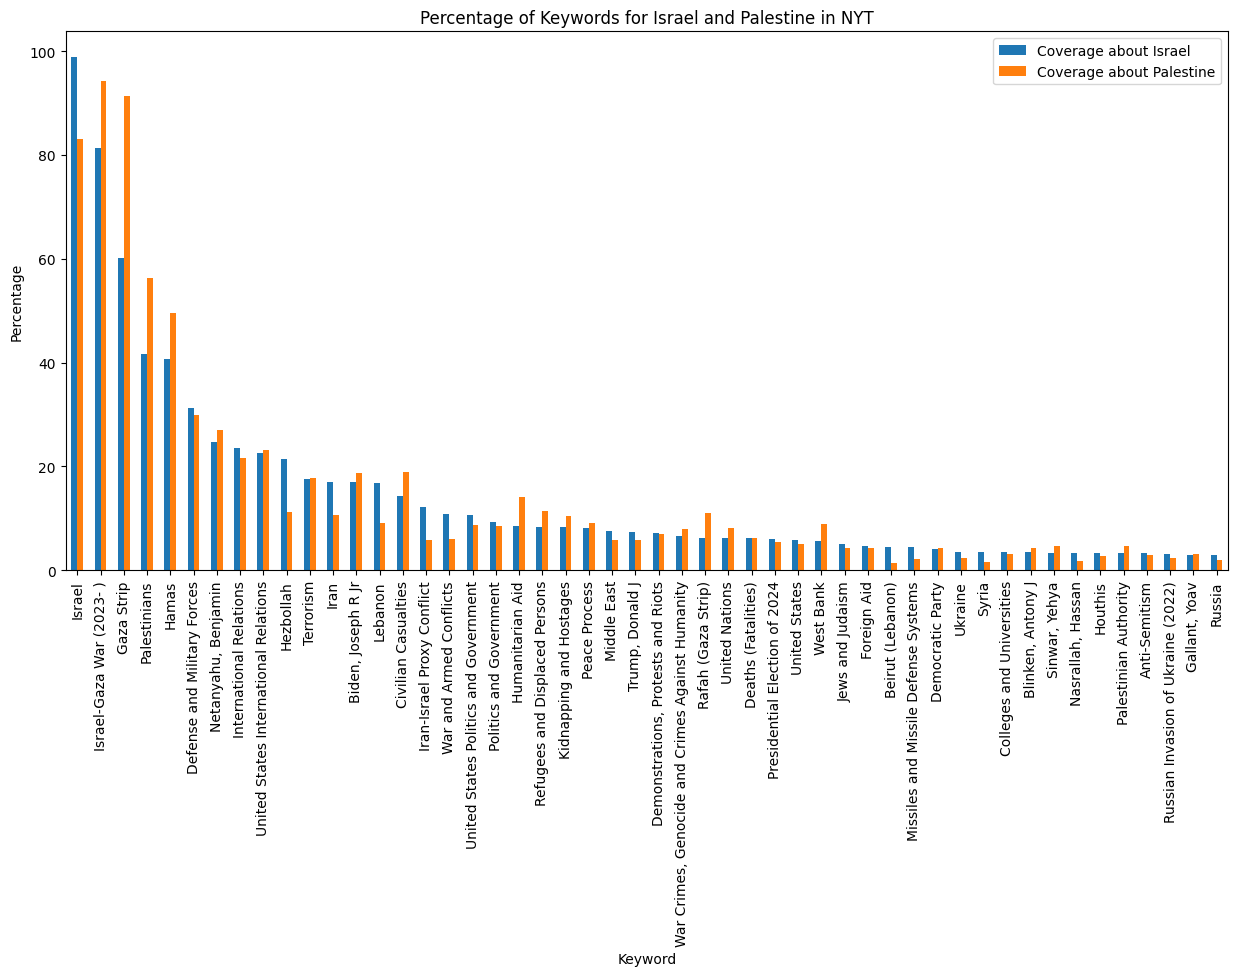

In [ ]:
compare_isr_pal_nyt[:50].sort_values(by=["perc_isr", "perc_pal"], ascending=False).plot(x='Keyword', y=['perc_isr', 'perc_pal'], kind='bar', figsize=(15, 7))
plt.title('Percentage of Keywords for Israel and Palestine in NYT')
plt.xlabel('Keyword')
plt.ylabel('Percentage')
plt.legend(labels=["Coverage about Israel", "Coverage about Palestine"])
plt.show()

### NYT: Russia and Ukraine

In [90]:
russia_keywords_nyt = nyt_country_coverage.iloc[[184]]
russia_keywords_nyt

country iso_alpha3   Latitude  Longitude  count_of_articles_nyt  \
184  Russia        RUS  64.686314  97.745306                 1218.0   

     count_of_articles_zeit  \
184                  1913.0   

                                   ids_of_articles_nyt  \
184  ['nyt://article/4086ee41-b6a8-53e6-b05a-9dbf91...   

                                  ids_of_articles_zeit  perc_of_coverage_nyt  \
184  ['8001092032', '8030570322', '8272000878', '79...              0.038304   

     perc_of_coverage_zeit  middle_point  \
184               0.041515      -0.00321   

                                          keywords_nyt  \
184  {'Russia': 1177, 'Russian Invasion of Ukraine ...   

                                         keywords_zeit  
184  {'Russland': 1997, 'Politik': 1223, 'Krieg in ...

In [91]:
russia_keywords_nyt = pd.DataFrame([*russia_keywords_nyt['keywords_nyt']],  russia_keywords_nyt.index).stack()\
      .rename_axis([None,'Keyword']).reset_index(1, name='Count')

In [92]:
russia_keywords_nyt

Keyword  Count
184                              Russia   1177
184  Russian Invasion of Ukraine (2022)    828
184                             Ukraine    707
184         Defense and Military Forces    440
184                   Putin, Vladimir V    401
..                                  ...    ...
184                           Informers      1
184             Russian Volunteer Corps      1
184                     Kapustin, Denis      1
184            Weddings and Engagements      1
184             Tolokonnikova, Nadezhda      1

[1482 rows x 2 columns]

In [93]:
ukr_keywords_nyt = nyt_country_coverage.iloc[[227]]
ukr_keywords_nyt

country iso_alpha3   Latitude  Longitude  count_of_articles_nyt  \
227  Ukraine        UKR  49.487197  31.271832                  978.0   

     count_of_articles_zeit  \
227                  1648.0   

                                   ids_of_articles_nyt  \
227  ['nyt://article/4086ee41-b6a8-53e6-b05a-9dbf91...   

                                  ids_of_articles_zeit  perc_of_coverage_nyt  \
227  ['8163133684', '8272000878', '7992865281', '82...              0.030757   

     perc_of_coverage_zeit  middle_point  \
227               0.035764     -0.005007   

                                          keywords_nyt  \
227  {'Ukraine': 946, 'Russian Invasion of Ukraine ...   

                                         keywords_zeit  
227  {'Krieg in der Ukraine': 1620, 'Politik': 969,...

In [94]:
ukr_keywords_nyt = pd.DataFrame([*ukr_keywords_nyt['keywords_nyt']],  ukr_keywords_nyt.index).stack()\
      .rename_axis([None,'Keyword']).reset_index(1, name='Count')

In [95]:
ukr_keywords_nyt

Keyword  Count
227                                         Ukraine    946
227              Russian Invasion of Ukraine (2022)    885
227                                          Russia    706
227                     Defense and Military Forces    460
227           United States International Relations    300
..                                              ...    ...
227                              Crumbley, Jennifer      1
227  Oxford Charter Township, Mich, Shooting (2021)      1
227                    Until August: A Novel (Book)      1
227                         Russian Volunteer Corps      1
227                                 Kapustin, Denis      1

[1189 rows x 2 columns]

In [100]:
compare_rus_ukr_nyt=russia_keywords_nyt.merge(ukr_keywords_nyt,left_on='Keyword',right_on='Keyword',how='outer')

In [101]:
compare_rus_ukr_nyt

Keyword  Count_x  Count_y
0                           20 Days in Mariupol (Movie)      1.0      3.0
1                     A House Made of Splinters (Movie)      1.0      1.0
2     A Nasty Little War: The Western Intervention i...      1.0      1.0
3                                   A Real Pain (Movie)      NaN      1.0
4                                              ADULTERY      NaN      1.0
...                                                 ...      ...      ...
1694                                          vis-photo     17.0     15.0
1695                                          vis-video     13.0      6.0
1696                              von der Leyen, Ursula      2.0      6.0
1697                                  your-feed-science      7.0      NaN
1698                    your-feed-visual-investigations      3.0      NaN

[1699 rows x 3 columns]

In [108]:
compare_rus_ukr_nyt["perc_rus"] = (compare_rus_ukr_nyt["Count_x"] / 1218.0) * 100
compare_rus_ukr_nyt["perc_urk"] = (compare_rus_ukr_nyt["Count_y"] / 978.0) * 100

In [ ]:
compare_rus_ukr_nyt

Keyword  Count_x  Count_y  \
0                           20 Days in Mariupol (Movie)      1.0      3.0   
1                     A House Made of Splinters (Movie)      1.0      1.0   
2     A Nasty Little War: The Western Intervention i...      1.0      1.0   
3                                   A Real Pain (Movie)      NaN      1.0   
4                                              ADULTERY      NaN      1.0   
...                                                 ...      ...      ...   
1694                                          vis-photo     17.0     15.0   
1695                                          vis-video     13.0      6.0   
1696                              von der Leyen, Ursula      2.0      6.0   
1697                                  your-feed-science      7.0      NaN   
1698                    your-feed-visual-investigations      3.0      NaN   

      perc_rus  perc_urk  
0     0.082102  0.306748  
1     0.082102  0.102249  
2     0.082102  0.102249  
3          NaN  0.102249  
4          NaN  0.102249  
...        ...       ...  
1694  1.395731  1.533742  
1695  1.067323  0.613497  
1696  0.164204  0.613497  
1697  0.574713       NaN  
1698  0.246305       NaN  

[1699 rows x 5 columns]

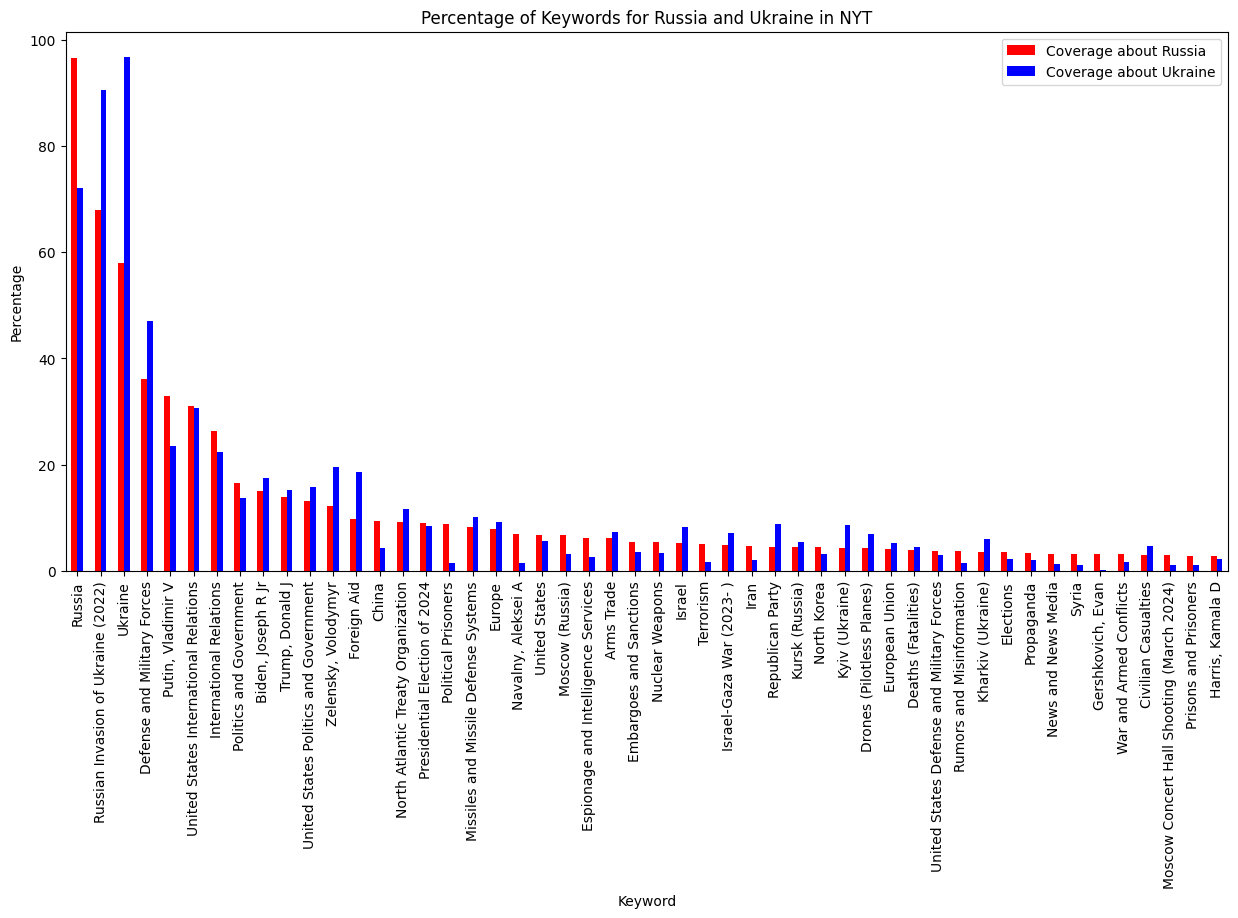

In [113]:
compare_rus_ukr_nyt.sort_values(by=["perc_rus", "perc_urk"], ascending=False)[:50].plot(x='Keyword', y=['perc_rus', 'perc_urk'], kind='bar', figsize=(15, 7), color=['red', 'blue'])
plt.title('Percentage of Keywords for Russia and Ukraine in NYT')
plt.xlabel('Keyword')
plt.ylabel('Percentage')
plt.legend(labels=["Coverage about Russia", "Coverage about Ukraine"])
plt.show()

### NYT: China

In [138]:
chn_keywords_nyt = nyt_country_coverage.iloc[[50]]
chn_keywords_nyt

country iso_alpha3   Latitude   Longitude  count_of_articles_nyt  \
50   China        CHN  35.000066  104.999955                 1023.0   

    count_of_articles_zeit                                ids_of_articles_nyt  \
50                   752.0  ['nyt://article/a586f56f-385c-525d-be9f-8b6bf1...   

                                 ids_of_articles_zeit  perc_of_coverage_nyt  \
50  ['8040867462', '8064214065', '8456290019', '83...              0.032172   

    perc_of_coverage_zeit  middle_point  \
50               0.016319      0.015852   

                                         keywords_nyt  \
50  {'China': 956, 'United States International Re...   

                                        keywords_zeit  
50  {'China': 777, 'Politik': 270, 'USA': 166, 'Ne...

In [139]:
chn_keywords_nyt = pd.DataFrame([*chn_keywords_nyt['keywords_nyt']],  chn_keywords_nyt.index).stack()\
      .rename_axis([None,'Keyword']).reset_index(1, name='Count')

In [140]:
chn_keywords_nyt["perc_chn"] = (chn_keywords_nyt["Count"] / 1023.0) * 100

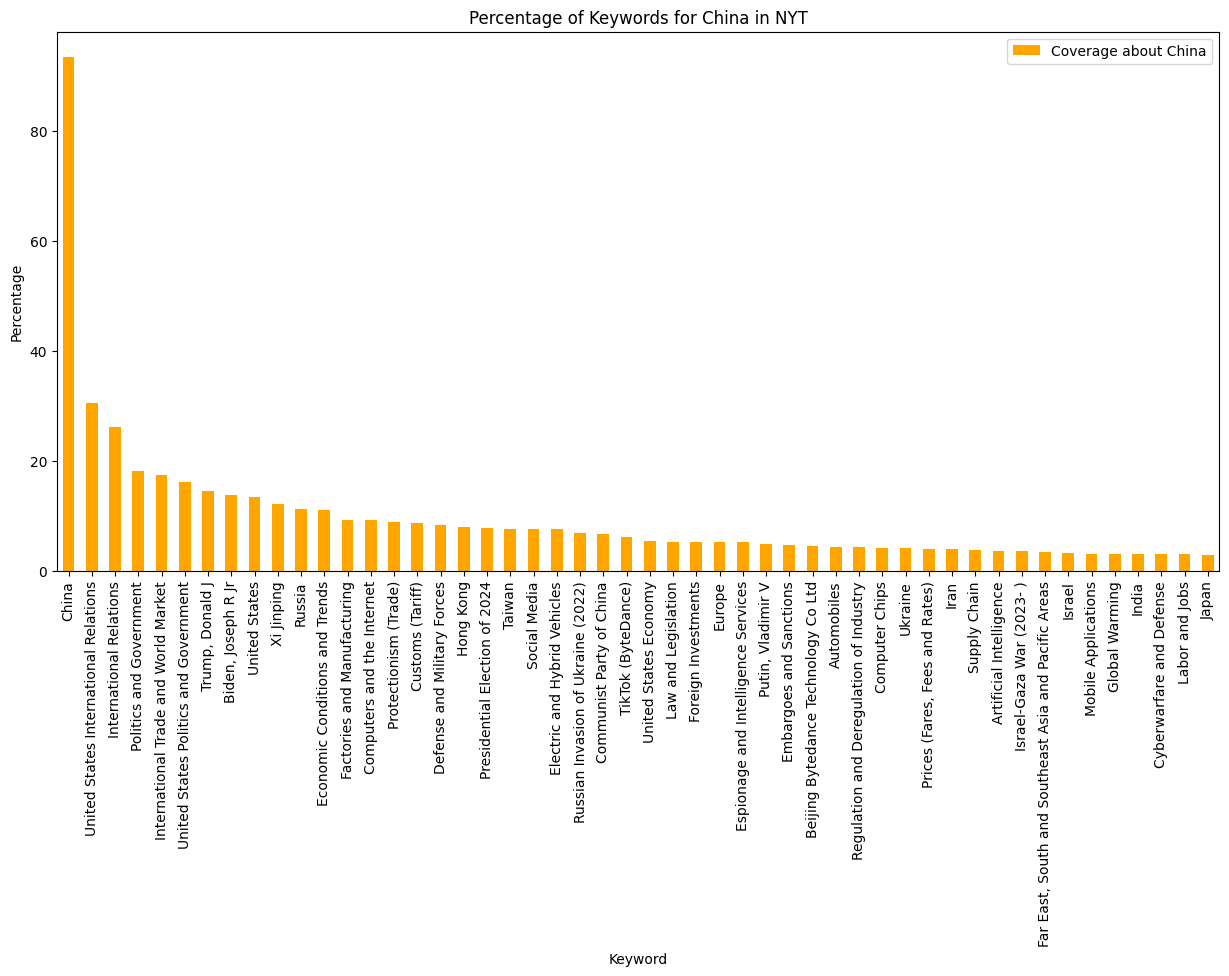

In [142]:
chn_keywords_nyt.sort_values(by=["perc_chn"], ascending=False)[:50].plot(x='Keyword', y=['perc_chn'], kind='bar', figsize=(15, 7), color=['orange'])
plt.title('Percentage of Keywords for China in NYT')
plt.xlabel('Keyword')
plt.ylabel('Percentage')
plt.legend(labels=["Coverage about China"])
plt.show()

### NYT: France

In [149]:
fr_keywords_nyt = nyt_country_coverage.iloc[[83]]
fr_keywords_nyt

country iso_alpha3   Latitude  Longitude  count_of_articles_nyt  \
83  France        FRA  46.603354   1.888334                  686.0   

    count_of_articles_zeit                                ids_of_articles_nyt  \
83                  1695.0  ['nyt://article/a5bd08c1-73cc-52f7-ad5a-2ac552...   

                                 ids_of_articles_zeit  perc_of_coverage_nyt  \
83  ['8013207758', '8233614090', '8013417643', '81...              0.021574   

    perc_of_coverage_zeit  middle_point  \
83               0.036784      -0.01521   

                                         keywords_nyt  \
83  {'France': 422, 'Paris (France)': 258, 'Macron...   

                                        keywords_zeit  
83  {'Frankreich': 1053, 'Paris': 700, 'News': 644...

In [150]:
fr_keywords_nyt = pd.DataFrame([*fr_keywords_nyt['keywords_nyt']],  fr_keywords_nyt.index).stack()\
      .rename_axis([None,'Keyword']).reset_index(1, name='Count')

In [151]:
fr_keywords_nyt["perc_fr"] = (fr_keywords_nyt["Count"] / 686) * 100

In [152]:
fr_keywords_nyt

Keyword  Count    perc_fr
83                        France    422  61.516035
83                Paris (France)    258  37.609329
83     Macron, Emmanuel (1977- )    165  24.052478
83       Politics and Government    162  23.615160
83          Olympic Games (2024)    111  16.180758
..                           ...    ...        ...
83                  Edebiri, Ayo      1   0.145773
83     Coughlan, Nicola (1987- )      1   0.145773
83  Molland, Josette (1923-2024)      1   0.145773
83                         Nepal      1   0.145773
83                        Belize      1   0.145773

[1747 rows x 3 columns]

## Zeit

In [46]:
zeit_country_coverage = country_coverage[country_coverage["country"] != "Germany"]

In [47]:
zeit_country_coverage["keywords_zeit"] = zeit_country_coverage["keywords_zeit"].apply(ast.literal_eval)

/var/folders/r5/fx7j1zqs3nv_x8c3rvmrqzzw0000gq/T/ipykernel_85409/3380573454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zeit_country_coverage["keywords_zeit"] = zeit_country_coverage["keywords_zeit"].apply(ast.literal_eval)


In [48]:
country_coverage_exploded_zeit = pd.DataFrame([*zeit_country_coverage['keywords_zeit']], zeit_country_coverage.index).stack()\
      .rename_axis([None,'Keyword']).reset_index(1, name='Count')

In [49]:
zeit_keywords_sum = country_coverage_exploded_zeit.groupby(["Keyword"]).Count.sum().reset_index()

In [50]:
zeit_keywords_sum = zeit_keywords_sum.sort_values(by="Count", ascending=False)

In [51]:
zeit_keywords_sum[:100]

Keyword   Count
15538               Politik  9437.0
14165                  News  6718.0
20287                   USA  5084.0
16936              Russland  4180.0
11086  Krieg in der Ukraine  3097.0
...                     ...     ...
4985                 Drohne   283.0
9643                  Jemen   280.0
18352              Spionage   271.0
14963   Palästinensergebiet   262.0
13758               München   258.0

[100 rows x 2 columns]

### Top five countries for Zeit

In [53]:
top_five_zeit = zeit_country_coverage.sort_values(by="count_of_articles_zeit", ascending=False)
top_five_zeit = top_five_zeit[:5]
top_five_zeit

country iso_alpha3   Latitude   Longitude  count_of_articles_nyt  \
231  United States        USA  39.783730 -100.445882                13634.0   
184         Russia        RUS  64.686314   97.745306                 1218.0   
83          France        FRA  46.603354    1.888334                  686.0   
227        Ukraine        UKR  49.487197   31.271832                  978.0   
114         Israel        ISR  30.812425   34.859476                 2168.0   

     count_of_articles_zeit  \
231                  3789.0   
184                  1913.0   
83                   1695.0   
227                  1648.0   
114                  1490.0   

                                   ids_of_articles_nyt  \
231  ['nyt://article/0604e760-a027-5493-ba76-dec3df...   
184  ['nyt://article/4086ee41-b6a8-53e6-b05a-9dbf91...   
83   ['nyt://article/a5bd08c1-73cc-52f7-ad5a-2ac552...   
227  ['nyt://article/4086ee41-b6a8-53e6-b05a-9dbf91...   
114  ['nyt://article/d86ab213-6ef2-5775-9877-69a9cb...   

                                  ids_of_articles_zeit  perc_of_coverage_nyt  \
231  ['8442292768', '8400105319', '8062621382', '81...              0.428769   
184  ['8001092032', '8030570322', '8272000878', '79...              0.038304   
83   ['8013207758', '8233614090', '8013417643', '81...              0.021574   
227  ['8163133684', '8272000878', '7992865281', '82...              0.030757   
114  ['8446243723', '8423557965', '8248019338', '83...              0.068180   

     perc_of_coverage_zeit  middle_point  \
231               0.082227      0.346543   
184               0.041515     -0.003210   
83                0.036784     -0.015210   
227               0.035764     -0.005007   
114               0.032335      0.035845   

                                          keywords_nyt  \
231  {'Presidential Election of 2024': 2341, 'Trump...   
184  {'Russia': 1177, 'Russian Invasion of Ukraine ...   
83   {'France': 422, 'Paris (France)': 258, 'Macron...   
227  {'Ukraine': 946, 'Russian Invasion of Ukraine ...   
114  {'Israel': 2143, 'Israel-Gaza War (2023- )': 1...   

                                         keywords_zeit  
231  {'USA': 3003, 'Politik': 1592, 'Donald Trump':...  
184  {'Russland': 1997, 'Politik': 1223, 'Krieg in ...  
83   {'Frankreich': 1053, 'Paris': 700, 'News': 644...  
227  {'Krieg in der Ukraine': 1620, 'Politik': 969,...  
114  {'Israel': 1507, 'Politik': 1025, 'Gazastreife...

In [60]:
top_five_zeit_keywords = pd.DataFrame([*top_five_zeit['keywords_zeit']],  top_five_zeit.index).stack()\
      .rename_axis([None,'Keyword']).reset_index(1, name='Count')

### Zeit: compare Israel and Palestine

In [61]:
israel_keywords_zeit = top_five_zeit_keywords.groupby(by=top_five_zeit_keywords.index).get_group(114)
israel_keywords_zeit

Keyword   Count
114            USA   265.0
114        Politik  1025.0
114   Donald Trump    27.0
114           News   247.0
114      Joe Biden   105.0
..             ...     ...
114   Rami Suliman     1.0
114  Gefahrenstufe     1.0
114    Konzerthaus     1.0
114   Gedenkstunde     1.0
114    Fabian Hinz     1.0

[1987 rows x 2 columns]

In [62]:
pal_keywords_zeit = zeit_country_coverage.iloc[[171]]

In [63]:
pal_keywords_zeit = pd.DataFrame([*pal_keywords_zeit['keywords_zeit']],  pal_keywords_zeit.index).stack()\
      .rename_axis([None,'Keyword']).reset_index(1, name='Count')

In [64]:
compare_isr_pal_zeit=israel_keywords_zeit.merge(pal_keywords_zeit,left_on='Keyword',right_on='Keyword',how='left')


In [67]:
compare_isr_pal_zeit["perc_isr"] = compare_isr_pal_zeit["Count_x"] / 1490.0 * 100
compare_isr_pal_zeit["perc_pal"] = compare_isr_pal_zeit["Count_y"] / 64.0 * 100

In [68]:
compare_isr_pal_zeit

Keyword  Count_x  Count_y   perc_isr  perc_pal
0               USA    265.0     19.0  17.785235   29.6875
1           Politik   1025.0     18.0  68.791946   28.1250
2      Donald Trump     27.0      NaN   1.812081       NaN
3              News    247.0     34.0  16.577181   53.1250
4         Joe Biden    105.0      8.0   7.046980   12.5000
...             ...      ...      ...        ...       ...
1982   Rami Suliman      1.0      NaN   0.067114       NaN
1983  Gefahrenstufe      1.0      NaN   0.067114       NaN
1984    Konzerthaus      1.0      NaN   0.067114       NaN
1985   Gedenkstunde      1.0      NaN   0.067114       NaN
1986    Fabian Hinz      1.0      NaN   0.067114       NaN

[1987 rows x 5 columns]

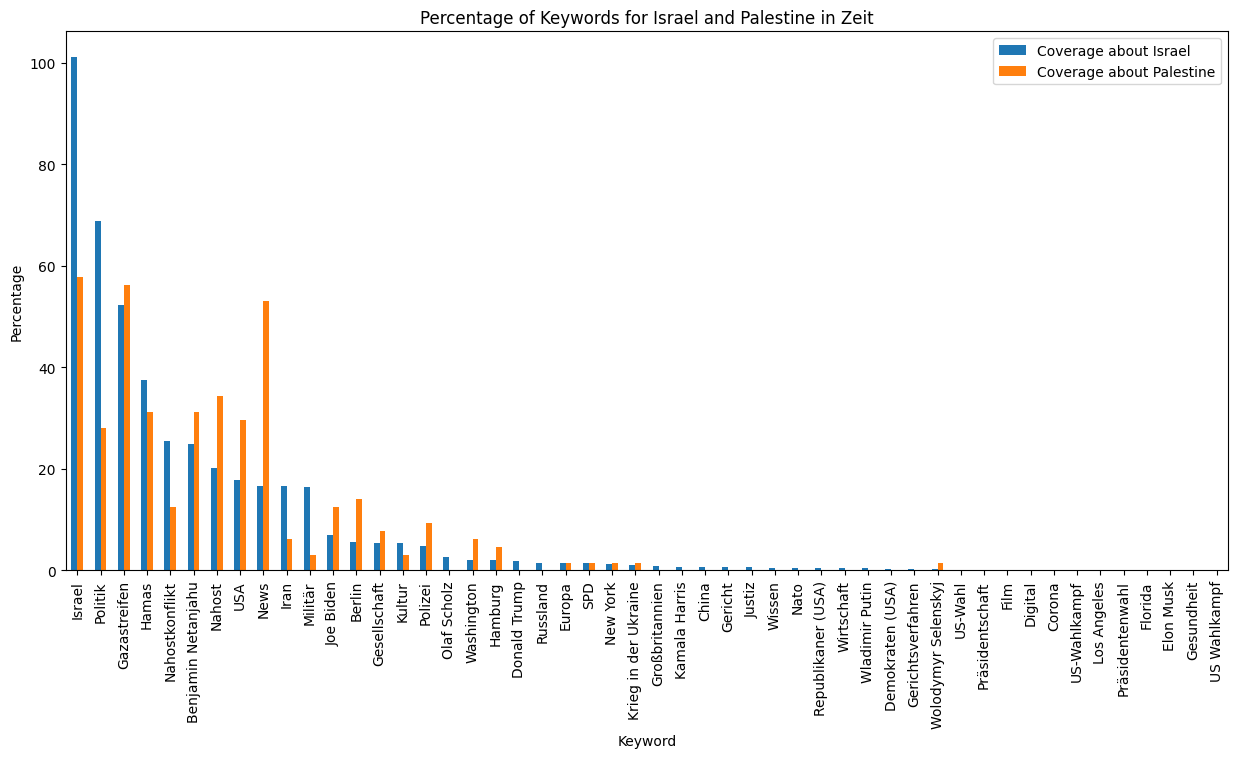

In [85]:
compare_isr_pal_zeit[:50].sort_values(by=["perc_isr", "perc_pal"], ascending=False).plot(x='Keyword', y=['perc_isr', 'perc_pal'], kind='bar', figsize=(15, 7))
plt.title('Percentage of Keywords for Israel and Palestine in Zeit')
plt.xlabel('Keyword')
plt.ylabel('Percentage')
plt.legend(labels=["Coverage about Israel", "Coverage about Palestine"])
plt.show()

### Zeit: Russia and Ukraine

In [120]:
russia_keywords_zeit = zeit_country_coverage.iloc[[183]]
russia_keywords_zeit

country iso_alpha3   Latitude  Longitude  count_of_articles_nyt  \
184  Russia        RUS  64.686314  97.745306                 1218.0   

     count_of_articles_zeit  \
184                  1913.0   

                                   ids_of_articles_nyt  \
184  ['nyt://article/4086ee41-b6a8-53e6-b05a-9dbf91...   

                                  ids_of_articles_zeit  perc_of_coverage_nyt  \
184  ['8001092032', '8030570322', '8272000878', '79...              0.038304   

     perc_of_coverage_zeit  middle_point  \
184               0.041515      -0.00321   

                                          keywords_nyt  \
184  {'Russia': 1177, 'Russian Invasion of Ukraine ...   

                                         keywords_zeit  
184  {'Russland': 1997, 'Politik': 1223, 'Krieg in ...

In [121]:
russia_keywords_zeit = pd.DataFrame([*russia_keywords_zeit['keywords_zeit']],  russia_keywords_zeit.index).stack()\
      .rename_axis([None,'Keyword']).reset_index(1, name='Count')

In [122]:
ukr_keywords_zeit = zeit_country_coverage.iloc[[226]]
ukr_keywords_zeit

country iso_alpha3   Latitude  Longitude  count_of_articles_nyt  \
227  Ukraine        UKR  49.487197  31.271832                  978.0   

     count_of_articles_zeit  \
227                  1648.0   

                                   ids_of_articles_nyt  \
227  ['nyt://article/4086ee41-b6a8-53e6-b05a-9dbf91...   

                                  ids_of_articles_zeit  perc_of_coverage_nyt  \
227  ['8163133684', '8272000878', '7992865281', '82...              0.030757   

     perc_of_coverage_zeit  middle_point  \
227               0.035764     -0.005007   

                                          keywords_nyt  \
227  {'Ukraine': 946, 'Russian Invasion of Ukraine ...   

                                         keywords_zeit  
227  {'Krieg in der Ukraine': 1620, 'Politik': 969,...

In [123]:
ukr_keywords_zeit = pd.DataFrame([*ukr_keywords_zeit['keywords_zeit']],  ukr_keywords_zeit.index).stack()\
      .rename_axis([None,'Keyword']).reset_index(1, name='Count')

In [124]:
compare_rus_ukr_zeit=russia_keywords_zeit.merge(ukr_keywords_zeit,left_on='Keyword',right_on='Keyword',how='outer')

In [125]:
compare_rus_ukr_zeit

Keyword  Count_x  Count_y
0     "Abseits des Krieges" von Gunnar Hindrichs      NaN      1.0
1                             "Becoming Nawalny"      1.0      NaN
2             "Der Absprung" von Maria Stepanova      1.0      1.0
3                                  "Der Ostcast"      1.0      1.0
4             "Der Philosoph" von Philipp Felsch      NaN      1.0
...                                          ...      ...      ...
4272                         Überraschungsmoment      1.0      1.0
4273                              Überschwemmung      6.0      1.0
4274                                Überseehafen      2.0      NaN
4275                               Übungsmanöver      1.0      NaN
4276                               Żaklin Nastić      1.0      NaN

[4277 rows x 3 columns]

In [129]:
compare_rus_ukr_zeit["perc_rus"] = (compare_rus_ukr_zeit["Count_x"] / 1913.0) * 100
compare_rus_ukr_zeit["perc_urk"] = (compare_rus_ukr_zeit["Count_y"] / 1648.0) * 100

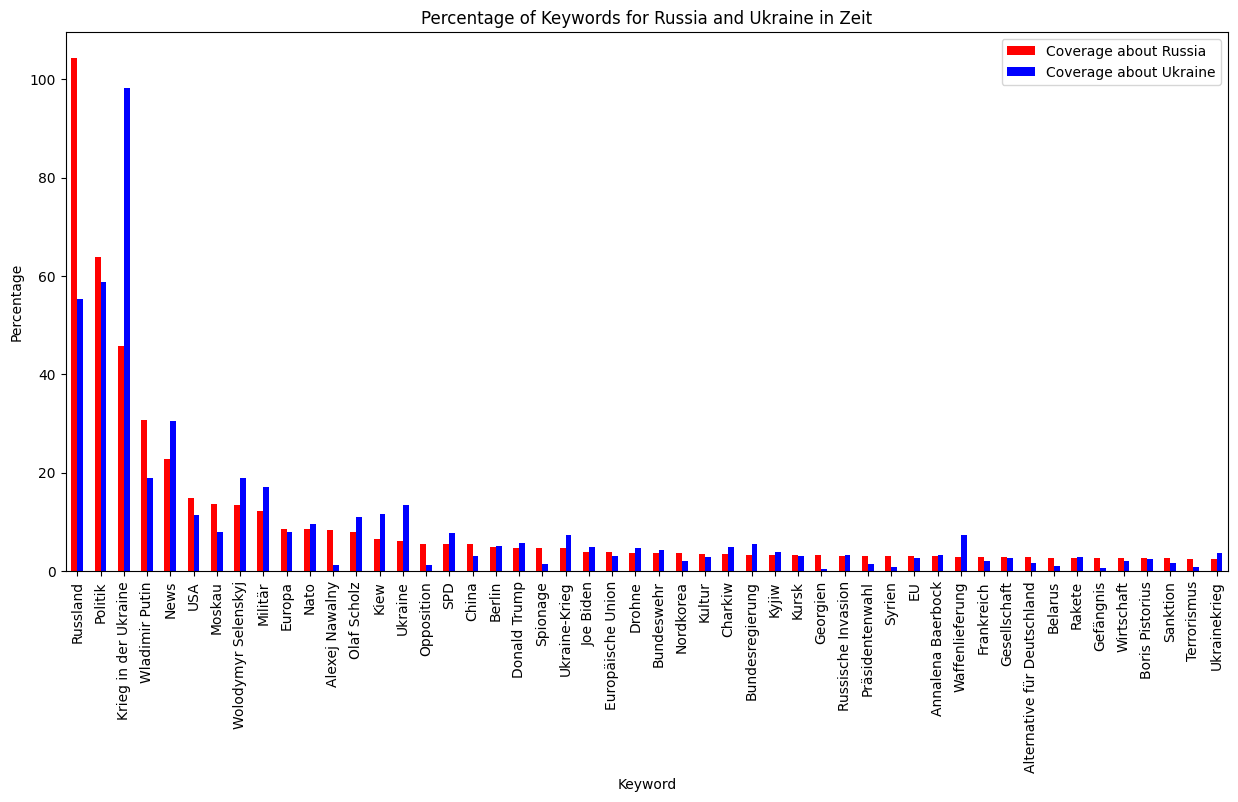

In [130]:
compare_rus_ukr_zeit.sort_values(by=["perc_rus", "perc_urk"], ascending=False)[:50].plot(x='Keyword', y=['perc_rus', 'perc_urk'], kind='bar', figsize=(15, 7), color=['red', 'blue'])
plt.title('Percentage of Keywords for Russia and Ukraine in Zeit')
plt.xlabel('Keyword')
plt.ylabel('Percentage')
plt.legend(labels=["Coverage about Russia", "Coverage about Ukraine"])
plt.show()

In [131]:
zeit_country_coverage

country iso_alpha3   Latitude   Longitude  count_of_articles_nyt  \
0    Adriatic Sea    No code  43.702151   14.667946                    1.0   
1      Aegean Sea    No code  38.062228   25.720589                    2.0   
2     Afghanistan        AFG  33.768006   66.238514                   89.0   
3          Africa        ZAF  11.502434   17.757812                  199.0   
4         Albania        ALB   5.758765  -73.915162                   20.0   
..            ...        ...        ...         ...                    ...   
237       Vietnam        VNM  15.926666  107.965086                   51.0   
238    Yellow Sea    No code  36.000000  124.000000                    1.0   
239         Yemen        YEM  16.347124   47.891527                   90.0   
240        Zambia        ZMB -14.518912   27.558988                   11.0   
241      Zimbabwe        ZWE -18.455496   29.746841                    3.0   

     count_of_articles_zeit  \
0                       0.0   
1                       0.0   
2                     168.0   
3                       0.0   
4                      61.0   
..                      ...   
237                    35.0   
238                     0.0   
239                    99.0   
240                     5.0   
241                     6.0   

                                   ids_of_articles_nyt  \
0    ['nyt://article/6c5919fe-452a-532d-8234-f698a3...   
1    ['nyt://interactive/6addaf57-b7fa-5d0f-af24-ec...   
2    ['nyt://article/bf24d7e3-26df-577e-8327-5ad156...   
3    ['nyt://article/e4d46fbb-0e78-5c0f-8bbe-9caa61...   
4    ['nyt://article/c81db80b-5820-56a0-b426-1466f0...   
..                                                 ...   
237  ['nyt://article/182fbcdd-cf29-534a-900d-c2d66f...   
238  ['nyt://article/593fcdd3-0e07-58b1-9a5d-eec8cd...   
239  ['nyt://article/df39f071-31c5-5992-aaef-19f15a...   
240  ['nyt://article/bc01f508-b5f4-5c61-a671-45a715...   
241  ['nyt://article/415aea4c-2180-5418-ba50-e6bad3...   

                                  ids_of_articles_zeit  perc_of_coverage_nyt  \
0                                                   []              0.000031   
1                                                   []              0.000063   
2    ['8298581376', '8184489802', '8478156165', '81...              0.002799   
3                                                   []              0.006258   
4    ['8374221914', '8406497605', '8406583117', '83...              0.000629   
..                                                 ...                   ...   
237  ['8316584811', '8107267090', '8336739402', '83...              0.001604   
238                                                 []              0.000031   
239  ['7937609389', '8367515653', '8316863505', '81...              0.002830   
240  ['8362705221', '7927847804', '8253025150', '84...              0.000346   
241  ['7927847804', '8061318921', '7957960454', '79...              0.000094   

     perc_of_coverage_zeit  middle_point  \
0                 0.000000      0.000031   
1                 0.000000      0.000063   
2                 0.003646     -0.000847   
3                 0.000000      0.006258   
4                 0.001324     -0.000695   
..                     ...           ...   
237               0.000760      0.000844   
238               0.000000      0.000031   
239               0.002148      0.000682   
240               0.000109      0.000237   
241               0.000130     -0.000036   

                                          keywords_nyt  \
0    {'Eni SpA': 1, 'Carbon Capture and Sequestrati...   
1    {'Restaurants': 2, 'Travel and Vacations': 2, ...   
2    {'AFGHANISTAN': 87, 'Taliban': 44, 'Afghanista...   
3    {'AFRICA': 195, 'Politics and Government': 31,...   
4    {'ALBANIA': 13, 'Zegler, Rachel (2001- )': 7, ...   
..                                                 ...   
237  {'Vietnam': 43, 'China': 13, 'Politics and Gov...   
238  {'Snow and Snowstorms': 1, 'Weather': 1, 'Gl

### Zeit: France

In [158]:
france_keywords_zeit = zeit_country_coverage.iloc[[83]]
france_keywords_zeit

country iso_alpha3   Latitude  Longitude  count_of_articles_nyt  \
83  France        FRA  46.603354   1.888334                  686.0   

    count_of_articles_zeit                                ids_of_articles_nyt  \
83                  1695.0  ['nyt://article/a5bd08c1-73cc-52f7-ad5a-2ac552...   

                                 ids_of_articles_zeit  perc_of_coverage_nyt  \
83  ['8013207758', '8233614090', '8013417643', '81...              0.021574   

    perc_of_coverage_zeit  middle_point  \
83               0.036784      -0.01521   

                                         keywords_nyt  \
83  {'France': 422, 'Paris (France)': 258, 'Macron...   

                                        keywords_zeit  
83  {'Frankreich': 1053, 'Paris': 700, 'News': 644...

In [159]:
france_keywords_zeit = pd.DataFrame([*france_keywords_zeit['keywords_zeit']],  france_keywords_zeit.index).stack()\
      .rename_axis([None,'Keyword']).reset_index(1, name='Count')

In [160]:
france_keywords_zeit

Keyword  Count
83         Frankreich   1053
83              Paris    700
83               News    644
83            Politik    380
83  Olympische Spiele    293
..                ...    ...
83          Schlieben      1
83              Szene      1
83      Emilio Emelie      1
83     Angelo Mattina      1
83   Ulrich Reinhardt      1

[4227 rows x 2 columns]

In [161]:
france_keywords_zeit["perc_fr"] = (france_keywords_zeit["Count"] / 1695.0) * 100

In [163]:
france_keywords_zeit

Keyword  Count    perc_fr
83         Frankreich   1053  62.123894
83              Paris    700  41.297935
83               News    644  37.994100
83            Politik    380  22.418879
83  Olympische Spiele    293  17.286136
..                ...    ...        ...
83          Schlieben      1   0.058997
83              Szene      1   0.058997
83      Emilio Emelie      1   0.058997
83     Angelo Mattina      1   0.058997
83   Ulrich Reinhardt      1   0.058997

[4227 rows x 3 columns]

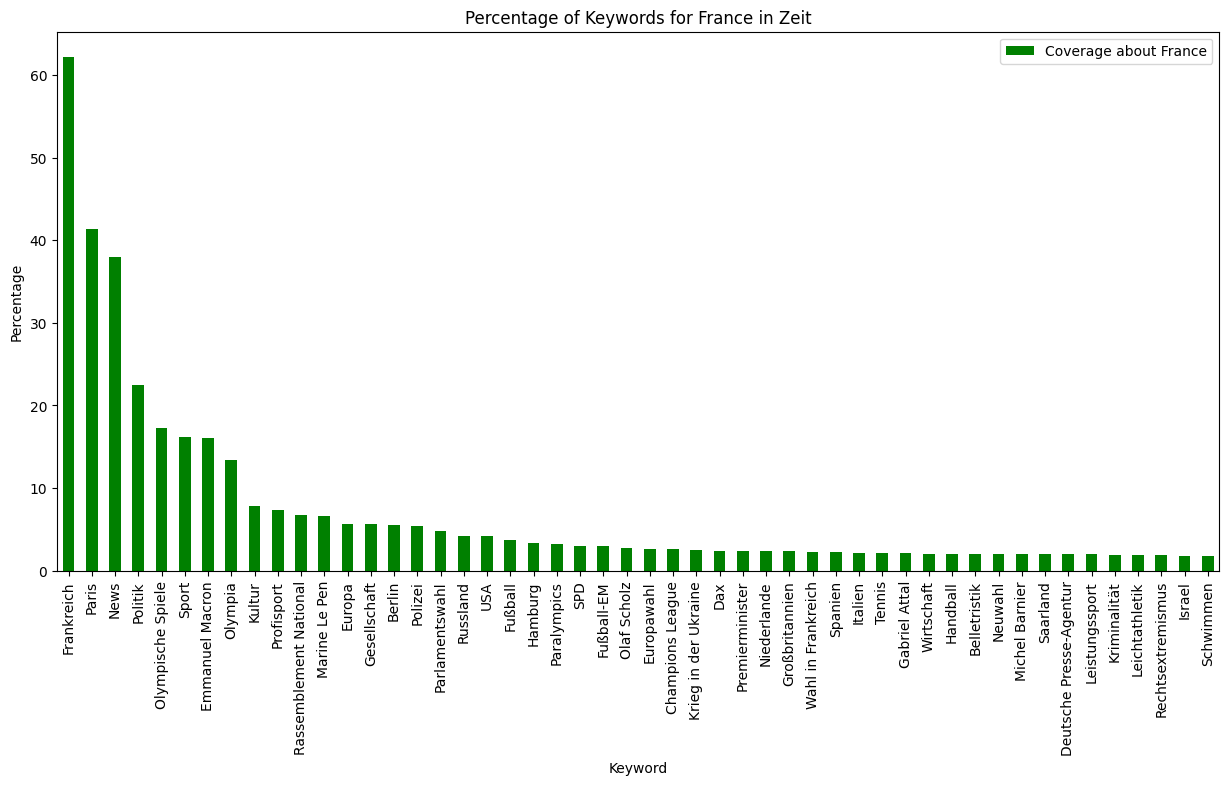

In [162]:
france_keywords_zeit.sort_values(by=["perc_fr"], ascending=False)[:50].plot(x='Keyword', y=['perc_fr'], kind='bar', figsize=(15, 7), color=['green'])
plt.title('Percentage of Keywords for France in Zeit')
plt.xlabel('Keyword')
plt.ylabel('Percentage')
plt.legend(labels=["Coverage about France"])
plt.show()

### Zeit: China

In [154]:
chn_keywords_zeit = zeit_country_coverage.iloc[[50]]
chn_keywords_zeit

country iso_alpha3   Latitude   Longitude  count_of_articles_nyt  \
50   China        CHN  35.000066  104.999955                 1023.0   

    count_of_articles_zeit                                ids_of_articles_nyt  \
50                   752.0  ['nyt://article/a586f56f-385c-525d-be9f-8b6bf1...   

                                 ids_of_articles_zeit  perc_of_coverage_nyt  \
50  ['8040867462', '8064214065', '8456290019', '83...              0.032172   

    perc_of_coverage_zeit  middle_point  \
50               0.016319      0.015852   

                                         keywords_nyt  \
50  {'China': 956, 'United States International Re...   

                                        keywords_zeit  
50  {'China': 777, 'Politik': 270, 'USA': 166, 'Ne...

In [155]:
chn_keywords_zeit = pd.DataFrame([*chn_keywords_zeit['keywords_zeit']],  chn_keywords_zeit.index).stack()\
      .rename_axis([None,'Keyword']).reset_index(1, name='Count')

In [156]:
chn_keywords_zeit["perc_fr"] = (chn_keywords_zeit["Count"] / 752) * 100

In [157]:
chn_keywords_zeit

Keyword  Count     perc_fr
50                    China    777  103.324468
50                  Politik    270   35.904255
50                      USA    166   22.074468
50                     News    162   21.542553
50               Wirtschaft    134   17.819149
..                      ...    ...         ...
50           Sergei Schoigu      1    0.132979
50  Tischtennis-Grand-Smash      1    0.132979
50                Timo Boll      1    0.132979
50      Borussia Düsseldorf      1    0.132979
50              Tischtennis      1    0.132979

[1853 rows x 3 columns]